<h4>Authors Manisha Chandran and Vishwas Desai</h4>

<h3>Deep neural Network</h3>
<p>A simplistic representation of a Deep Neural Network is a hierarchical (layered) organization of neurons with connections to other neurons. Based on the received input, these neurons send a message or signal to other neurons, forming a complex network that learns through a feedback mechanism.</p>

In [25]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch import nn
from torch.autograd import Variable
from sklearn.metrics import log_loss, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving trainset_2.csv to trainset_2.csv


In [4]:
df = pd.read_csv("trainset_2.csv")
df.head()

,rating,budget,box_office,positive_rate,Adventure,Animation,Children,Comedy,Fantasy,Drama,Romance,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,Musical,War,IMAX,Documentary,Western,Film-Noir,(no genres listed),John Lasseter,Joe Johnston,Forest Whitaker,Michael Mann,Sydney Pollack,Peter Hyams,Martin Campbell,Rob Reiner,Mel Brooks,Ang Lee,Steve Oedekerk,Joseph Ruben,Barry Sonnenfeld,Richard Donner,John N. Smith,Terry Gilliam,...,Elodie Yung,Tsuwayuki Saotome,Taron Egerton,Edward Holcroft,Gordon Alexander,Joel Hogan,Josh Potthoff,Megan Peta Hill,Sarah Wright,Laurie Metcalf,Tracy Letts,Paapa Essiedu,Yassine Zeroual,Asan N'Jie,Anthony Gonzalez,Michael Stahl-David,Sally Hawkins,Jack Gore,Jet Jurgensmeyer,Nile Diaz,Lesley Manville,Lin Shaye,Walton Goggins,Storm Reid,Oprah Winfrey,Nick Robinson,Millicent Simmonds,Jóhannes Haukur Jóhannesson,Marcin Kowalczyk,John Cena,John Boyega,Cailee Spaeny,Rafe Spall,Sarah Vowell,Morena Baccarin,Joonas Suotamo,Lil Rel Howery,John David Washington,Isiah Whitlock Jr.,Amandla Stenberg
0,3.920930,0.001000,1.340000e-07,0.958333,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3.431818,0.001666,9.430000e-08,1.000000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2.357143,0.000533,2.920000e-08,0.200000,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3.946078,0.002000,4.300000e-08,0.760000,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3.185185,0.001933,3.130000e-08,0.880000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
cols = list(df.columns)
cols.remove('rating')
cols
X = np.array(df[cols])
y = np.array(df["rating"])
y_shape = y.shape[0]
y = np.reshape(y, (y_shape, 1))
print(X.shape)
print(y.shape)

(2818, 5054)
(2818, 1)


--------

## Our model


- `Activation Function`: Each layer will have one or more neurons, each of which will compute a small function, such as the activation function. The signal to proceed to the next associated neurons is imitated by the activation function. The output is transferred if the incoming neurons produce a value greater than a threshold, otherwise it is ignored. We make us eof ReLu activation Function for our model

- `L1 Loss Function`: L1 Loss Function is used to minimize the error which is the sum of the all the absolute differences between the true value and the predicted value. L1 loss function is preferered over other loss functions as it is not affected by outliers.


In [6]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Converting to tensors

def XtoTensor(array):
    array = np.array(array, dtype=np.float32) 
    return Variable(torch.from_numpy(array)).type(torch.FloatTensor)

def yToTensor(array):
    array = np.array(array.astype(int))
    return Variable(torch.from_numpy(array)).type(torch.FloatTensor)

# X
X_tensor_train = XtoTensor(X_train)
X_tensor_test = XtoTensor(X_test)

# y
y_tensor_train = yToTensor(y_train)
y_tensor_test = yToTensor(y_test)

In [7]:
N_FEATURES = X_train.shape[1]
# Neural Network Parameters

X_tensor_train = X_tensor_train.cuda()
X_tensor_test = X_tensor_test.cuda()
y_tensor_train = y_tensor_train.cuda()
y_tensor_test = y_tensor_test.cuda()

dropout_proba = 0.9
lr = 0.1
momentum = 0.99
dropout = torch.nn.Dropout(p=1 - (dropout_proba))
dropout = dropout.cuda()
# Hidden Layers

hiddenLayer_1=5000
hiddenLayer_2=1000
hiddenLayer_3=200
hiddenLayer_4=10

# NN Layers

linear_1=torch.nn.Linear(N_FEATURES, hiddenLayer_1, bias=True)
linear_2=torch.nn.Linear(hiddenLayer_1, hiddenLayer_2)
linear_3=torch.nn.Linear(hiddenLayer_2, hiddenLayer_3)
linear_4=torch.nn.Linear(hiddenLayer_3, hiddenLayer_4)
linear_5=torch.nn.Linear(hiddenLayer_4, 1)

linear_1 = linear_1.cuda()
linear_2 = linear_2.cuda()
linear_3 = linear_3.cuda()
linear_4 = linear_4.cuda()
linear_5 = linear_5.cuda()

# Activation Functions
# sigmoid = torch.nn.Sigmoid()
# threshold = nn.Threshold(0.5, 0)
# tanh= torch.nn.Tanh()
relu= torch.nn.ReLU()
# softmax = torch.nn.Softmax()

relu = relu.cuda()

# Neural Network

model = nn.Sequential(linear_1,nn.BatchNorm1d(hiddenLayer_1),relu,
                          linear_2,dropout,relu,
                          linear_3,dropout,relu,
                          linear_4,dropout,relu,
                          linear_5,dropout,relu,
                          relu
                          #sigmoid
                          )

In [10]:

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-3)
loss_function=torch.nn.L1Loss()
epochs = 1000
losses = []
# model.to(torch.device("cuda:0"))
model = model.cuda()
# optimizer = optimizer.cuda()
# loss_function = loss_function.cuda()

for step in range(epochs):    
    out = model(X_tensor_train) 
    # y_tensor_train = tf.squeeze(y_tensor_train)
    target = y_tensor_train
    # target = target.unsqueeze(1)
    # target = target.float()
    cost = loss_function(out, target) 
    optimizer.zero_grad()  
    # BackProp 
    cost.backward()   
    # adjusting the weights     
    optimizer.step()         
        
    if step % 5 == 0:        
        loss = cost.data
        losses.append(loss)
        print(step, cost.data.cpu().numpy())        
        prediction = (model(X_tensor_test).data).float()      
        pred_y = prediction.cpu().numpy().squeeze()
        target_y = y_tensor_test.cpu().data.numpy()
        print("Loss:" + str(torch.mean((y_tensor_test.cpu() - pred_y) **2).detach().item()))

0 27868.246
Loss:6.640240669250488
5 2.7675245
Loss:7.794326305389404
10 2.7675245
Loss:7.794326305389404
15 2.7675245
Loss:7.794326305389404
20 2.7675245
Loss:7.794326305389404
25 2.7675245
Loss:7.794326305389404
30 2.7675245
Loss:7.794326305389404
35 2.7675245
Loss:7.794326305389404
40 2.7675245
Loss:7.794326305389404
45 2.7675245
Loss:7.794326305389404
50 2.7675245
Loss:7.794326305389404
55 2.7675245
Loss:7.794326305389404
60 2.7675245
Loss:7.794326305389404
65 2.7675245
Loss:7.794326305389404
70 2.7675245
Loss:7.794326305389404
75 2.7675245
Loss:7.794326305389404
80 2.7675245
Loss:7.794326305389404
85 2.7675245
Loss:7.794326305389404
90 2.7675245
Loss:7.794326305389404
95 2.7675245
Loss:7.794326305389404
100 2.7675245
Loss:7.794326305389404
105 2.7675245
Loss:7.794326305389404
110 2.7675245
Loss:7.794326305389404
115 2.7675245
Loss:7.794326305389404
120 2.7675245
Loss:7.794326305389404
125 2.7675245
Loss:7.794326305389404
130 2.7675245
Loss:7.794326305389404
135 2.7675245
Loss:7.79

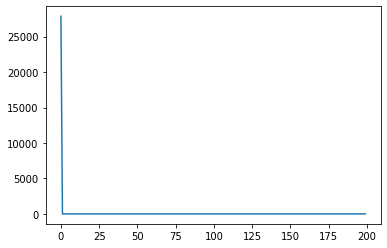

--------------------------------------------------
R2: -12.69137652845198
MSE: 7.7943263


In [26]:
# Graph
%matplotlib inline
plt.plot(losses)
plt.show()
pred_y = pred_y > 0.5
# print('f1 score', f1_score(target_y, pred_y))

print("--"*25)
# R2 
print('R2:',r2_score(target_y, pred_y))
print("MSE:",mean_squared_error(target_y, pred_y))

-------

## Hyperparameter Tuning

The process of determining the best combination of hyperparameters that enables the model to work at its best is known as hyperparameter tuning. The only way to get the best results out of models is to use the right combination of hyperparameters.


#### For `dropout` = 0.5, `learning rate` = 0.01, `momentum` = 0.55

0 2.6951344
Loss:6379.638671875
5 2.2593787
Loss:6.525671482086182
10 2.5965044
Loss:6.661040306091309
15 2.3741107
Loss:6.223891735076904
20 2.0990746
Loss:5.364850997924805
25 2.0528934
Loss:5.271401882171631
30 2.0742111
Loss:5.081155300140381
35 2.002137
Loss:5.243777751922607
40 1.9969049
Loss:5.039491176605225
45 1.9399694
Loss:4.785374641418457
50 1.9311216
Loss:5.0354719161987305
55 1.8810362
Loss:4.913243770599365
60 1.8307346
Loss:5.044691562652588
65 1.8496295
Loss:4.63255500793457
70 1.8433352
Loss:4.587392807006836
75 1.7578613
Loss:4.455867767333984
80 1.7870789
Loss:4.543249607086182
85 1.7433765
Loss:4.372928619384766
90 1.7547187
Loss:4.176758289337158
95 1.7187438
Loss:4.171981334686279
100 1.7170476
Loss:4.254055976867676
105 1.6691493
Loss:4.674685001373291
110 1.6853058
Loss:4.122927188873291
115 1.672367
Loss:4.263768196105957
120 1.7028421
Loss:4.298427581787109
125 1.6579062
Loss:4.3647379875183105
130 1.6407229
Loss:4.455217361450195
135 1.6637756
Loss:4.559031

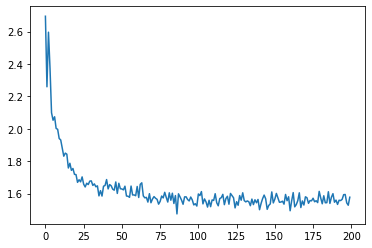

--------------------------------------------------
R2: -8.972654150159974
MSE: 5.6773047


In [28]:
N_FEATURES = X_train.shape[1]
# Neural Network Parameters

X_tensor_train = X_tensor_train.cuda()
X_tensor_test = X_tensor_test.cuda()
y_tensor_train = y_tensor_train.cuda()
y_tensor_test = y_tensor_test.cuda()

dropout_proba = 0.5
lr = 0.01
momentum = 0.55
dropout = torch.nn.Dropout(p=1 - (dropout_proba))
dropout = dropout.cuda()
# Hidden Layers

hiddenLayer_1=5000
hiddenLayer_2=1000
hiddenLayer_3=200
hiddenLayer_4=10

# NN Layers

linear_1=torch.nn.Linear(N_FEATURES, hiddenLayer_1, bias=True)
linear_2=torch.nn.Linear(hiddenLayer_1, hiddenLayer_2)
linear_3=torch.nn.Linear(hiddenLayer_2, hiddenLayer_3)
linear_4=torch.nn.Linear(hiddenLayer_3, hiddenLayer_4)
linear_5=torch.nn.Linear(hiddenLayer_4, 1)

linear_1 = linear_1.cuda()
linear_2 = linear_2.cuda()
linear_3 = linear_3.cuda()
linear_4 = linear_4.cuda()
linear_5 = linear_5.cuda()

# Activation Functions
# sigmoid = torch.nn.Sigmoid()
# threshold = nn.Threshold(0.5, 0)
# tanh= torch.nn.Tanh()
relu= torch.nn.ReLU()
# softmax = torch.nn.Softmax()

relu = relu.cuda()

# Neural Network

model = nn.Sequential(linear_1,nn.BatchNorm1d(hiddenLayer_1),relu,
                          linear_2,dropout,relu,
                          linear_3,dropout,relu,
                          linear_4,dropout,relu,
                          linear_5,dropout,relu,
                          relu
                          #sigmoid
                          )


optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-3)
loss_function=torch.nn.L1Loss()
epochs = 1000
losses = []
# model.to(torch.device("cuda:0"))
model = model.cuda()
# optimizer = optimizer.cuda()
# loss_function = loss_function.cuda()

for step in range(epochs):    
    out = model(X_tensor_train) 
    # y_tensor_train = tf.squeeze(y_tensor_train)
    target = y_tensor_train
    # target = target.unsqueeze(1)
    # target = target.float()
    cost = loss_function(out, target) 
    optimizer.zero_grad()  
    # BackProp 
    cost.backward()   
    # adjusting the weights     
    optimizer.step()         
        
    if step % 5 == 0:        
        loss = cost.data
        losses.append(loss)
        print(step, cost.data.cpu().numpy())        
        prediction = (model(X_tensor_test).data).float()      
        pred_y = prediction.cpu().numpy().squeeze()
        target_y = y_tensor_test.cpu().data.numpy()
        print("Loss:" + str(torch.mean((y_tensor_test.cpu() - pred_y) **2).detach().item()))


print("--"*25)
# Graph
%matplotlib inline
plt.plot(losses)
plt.show()
pred_y = pred_y > 0.5
# print('f1 score', f1_score(target_y, pred_y))

print("--"*25)
# R2 
print('R2:',r2_score(target_y, pred_y))
print("MSE:",mean_squared_error(target_y, pred_y))

#### For `dropout` = 0.3, `learning rate` = 0.001, `momentum` = 0.33

0 2.613501
Loss:19.95604705810547
5 2.44582
Loss:6.710725784301758
10 2.4404016
Loss:6.260131359100342
15 2.41821
Loss:6.267601013183594
20 2.3764386
Loss:6.347190856933594
25 2.364204
Loss:6.273499965667725
30 2.3764493
Loss:6.314511299133301
35 2.3534489
Loss:6.292153358459473
40 2.3393178
Loss:6.366074562072754
45 2.343541
Loss:6.448794364929199
50 2.288811
Loss:6.149898052215576
55 2.2904277
Loss:6.279263973236084
60 2.3160617
Loss:6.466237545013428
65 2.3277016
Loss:6.193740367889404
70 2.331949
Loss:6.050112247467041
75 2.3053746
Loss:6.212640285491943
80 2.3258986
Loss:6.094221115112305
85 2.3154204
Loss:6.103962421417236
90 2.268919
Loss:6.2217326164245605
95 2.2994063
Loss:6.257368087768555
100 2.2824337
Loss:6.05389928817749
105 2.2756917
Loss:6.10980749130249
110 2.258445
Loss:6.144439697265625
115 2.2663589
Loss:6.057452201843262
120 2.276255
Loss:6.246004104614258
125 2.2846088
Loss:6.00259256362915
130 2.254604
Loss:6.136509418487549
135 2.2732036
Loss:6.030725955963135
1

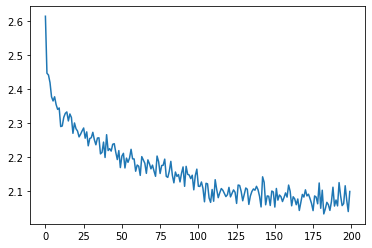

--------------------------------------------------
R2: -10.212228276257308
MSE: 6.382979


In [29]:
N_FEATURES = X_train.shape[1]
# Neural Network Parameters

X_tensor_train = X_tensor_train.cuda()
X_tensor_test = X_tensor_test.cuda()
y_tensor_train = y_tensor_train.cuda()
y_tensor_test = y_tensor_test.cuda()

dropout_proba = 0.3
lr = 0.001
momentum = 0.33
dropout = torch.nn.Dropout(p=1 - (dropout_proba))
dropout = dropout.cuda()
# Hidden Layers

hiddenLayer_1=5000
hiddenLayer_2=1000
hiddenLayer_3=200
hiddenLayer_4=10

# NN Layers

linear_1=torch.nn.Linear(N_FEATURES, hiddenLayer_1, bias=True)
linear_2=torch.nn.Linear(hiddenLayer_1, hiddenLayer_2)
linear_3=torch.nn.Linear(hiddenLayer_2, hiddenLayer_3)
linear_4=torch.nn.Linear(hiddenLayer_3, hiddenLayer_4)
linear_5=torch.nn.Linear(hiddenLayer_4, 1)

linear_1 = linear_1.cuda()
linear_2 = linear_2.cuda()
linear_3 = linear_3.cuda()
linear_4 = linear_4.cuda()
linear_5 = linear_5.cuda()

# Activation Functions
# sigmoid = torch.nn.Sigmoid()
# threshold = nn.Threshold(0.5, 0)
# tanh= torch.nn.Tanh()
relu= torch.nn.ReLU()
# softmax = torch.nn.Softmax()

relu = relu.cuda()

# Neural Network

model = nn.Sequential(linear_1,nn.BatchNorm1d(hiddenLayer_1),relu,
                          linear_2,dropout,relu,
                          linear_3,dropout,relu,
                          linear_4,dropout,relu,
                          linear_5,dropout,relu,
                          relu
                          #sigmoid
                          )


optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-3)
loss_function=torch.nn.L1Loss()
epochs = 1000
losses = []
# model.to(torch.device("cuda:0"))
model = model.cuda()
# optimizer = optimizer.cuda()
# loss_function = loss_function.cuda()

for step in range(epochs):    
    out = model(X_tensor_train) 
    # y_tensor_train = tf.squeeze(y_tensor_train)
    target = y_tensor_train
    # target = target.unsqueeze(1)
    # target = target.float()
    cost = loss_function(out, target) 
    optimizer.zero_grad()  
    # BackProp 
    cost.backward()   
    # adjusting the weights     
    optimizer.step()         
        
    if step % 5 == 0:        
        loss = cost.data
        losses.append(loss)
        print(step, cost.data.cpu().numpy())        
        prediction = (model(X_tensor_test).data).float()      
        pred_y = prediction.cpu().numpy().squeeze()
        target_y = y_tensor_test.cpu().data.numpy()
        print("Loss:" + str(torch.mean((y_tensor_test.cpu() - pred_y) **2).detach().item()))


print("--"*25)
# Graph
%matplotlib inline
plt.plot(losses)
plt.show()
pred_y = pred_y > 0.5
# print('f1 score', f1_score(target_y, pred_y))

print("--"*25)
# R2 
print('R2:',r2_score(target_y, pred_y))
print("MSE:",mean_squared_error(target_y, pred_y))

#### For `dropout` = 0.1, `learning rate` = 0.01, `momentum` = 0.11

0 2.8031907
Loss:8.325757026672363
5 3.1436648
Loss:12.261579513549805
10 2.8878775
Loss:21.180015563964844
15 2.8557813
Loss:14.573310852050781
20 2.8785572
Loss:7.824872970581055
25 2.7776792
Loss:7.793097019195557
30 2.7878811
Loss:7.843174934387207
35 2.7823198
Loss:11.130971908569336
40 2.7648954
Loss:7.78898811340332
45 2.7729442
Loss:11.882404327392578
50 2.7826579
Loss:7.916173934936523
55 2.7723186
Loss:7.783181667327881
60 2.7696605
Loss:7.8477582931518555
65 2.7619743
Loss:7.78711462020874
70 2.7678297
Loss:7.9463911056518555
75 2.764231
Loss:7.777744770050049
80 2.7682025
Loss:8.072833061218262
85 2.770218
Loss:7.78538703918457
90 2.7634723
Loss:7.770163536071777
95 2.7700589
Loss:7.780951499938965
100 2.761341
Loss:7.770302772521973
105 2.7596319
Loss:7.760559558868408
110 2.7631361
Loss:7.787613868713379
115 2.7780933
Loss:7.76967191696167
120 2.7614572
Loss:7.75986909866333
125 2.7630537
Loss:7.785386562347412
130 2.7691395
Loss:7.742452621459961
135 2.7604945
Loss:7.771

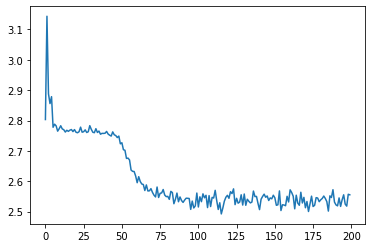

--------------------------------------------------
R2: -11.925207596241064
MSE: 7.358156


In [30]:
N_FEATURES = X_train.shape[1]
# Neural Network Parameters

X_tensor_train = X_tensor_train.cuda()
X_tensor_test = X_tensor_test.cuda()
y_tensor_train = y_tensor_train.cuda()
y_tensor_test = y_tensor_test.cuda()

dropout_proba = 0.1
lr = 0.001
momentum = 0.11
dropout = torch.nn.Dropout(p=1 - (dropout_proba))
dropout = dropout.cuda()
# Hidden Layers

hiddenLayer_1=5000
hiddenLayer_2=1000
hiddenLayer_3=200
hiddenLayer_4=10

# NN Layers

linear_1=torch.nn.Linear(N_FEATURES, hiddenLayer_1, bias=True)
linear_2=torch.nn.Linear(hiddenLayer_1, hiddenLayer_2)
linear_3=torch.nn.Linear(hiddenLayer_2, hiddenLayer_3)
linear_4=torch.nn.Linear(hiddenLayer_3, hiddenLayer_4)
linear_5=torch.nn.Linear(hiddenLayer_4, 1)

linear_1 = linear_1.cuda()
linear_2 = linear_2.cuda()
linear_3 = linear_3.cuda()
linear_4 = linear_4.cuda()
linear_5 = linear_5.cuda()

# Activation Functions
# sigmoid = torch.nn.Sigmoid()
# threshold = nn.Threshold(0.5, 0)
# tanh= torch.nn.Tanh()
relu= torch.nn.ReLU()
# softmax = torch.nn.Softmax()

relu = relu.cuda()

# Neural Network

model = nn.Sequential(linear_1,nn.BatchNorm1d(hiddenLayer_1),relu,
                          linear_2,dropout,relu,
                          linear_3,dropout,relu,
                          linear_4,dropout,relu,
                          linear_5,dropout,relu,
                          relu
                          #sigmoid
                          )


optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-3)
loss_function=torch.nn.L1Loss()
epochs = 1000
losses = []
# model.to(torch.device("cuda:0"))
model = model.cuda()
# optimizer = optimizer.cuda()
# loss_function = loss_function.cuda()

for step in range(epochs):    
    out = model(X_tensor_train) 
    # y_tensor_train = tf.squeeze(y_tensor_train)
    target = y_tensor_train
    # target = target.unsqueeze(1)
    # target = target.float()
    cost = loss_function(out, target) 
    optimizer.zero_grad()  
    # BackProp 
    cost.backward()   
    # adjusting the weights     
    optimizer.step()         
        
    if step % 5 == 0:        
        loss = cost.data
        losses.append(loss)
        print(step, cost.data.cpu().numpy())        
        prediction = (model(X_tensor_test).data).float()      
        pred_y = prediction.cpu().numpy().squeeze()
        target_y = y_tensor_test.cpu().data.numpy()
        print("Loss:" + str(torch.mean((y_tensor_test.cpu() - pred_y) **2).detach().item()))


print("--"*25)
# Graph
%matplotlib inline
plt.plot(losses)
plt.show()
pred_y = pred_y > 0.5
# print('f1 score', f1_score(target_y, pred_y))

print("--"*25)
# R2 
print('R2:',r2_score(target_y, pred_y))
print("MSE:",mean_squared_error(target_y, pred_y))

## Discussion

It is not mathematically impossible to have a negative R2 score. It simply implies that our model, with all of its constants, does not suit the data well, and as a result, we implemented the Support Vector Regressor and Random Forest Regressor models.